# MATH 360 Problem Set 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

print("packages imported")

packages imported


## Numerical Methods for Differential Equations

The following function implements Euler's method for systems:

In [2]:
def odeEulerSys(f,t,u0):
    u = np.zeros([len(t),len(u0)])
    u[0,:] = u0
    for n in range(0,len(t)-1):
        u[n+1,:] = u[n,:] + f(t[n],u[n,:])*(t[n+1] - t[n])
    return u

 Create a new function to implement the [4th order Runge-Kutta (RK4) method](https://en.wikipedia.org/wiki/Runge–Kutta_methods) for systems. Use Euler's method, RK4 method and `scipy.integrate.odeint` to approximate solutions of the [Lotka-Volterra equations](https://ubcmath.github.io/MATH360/deterministic/nondimensionalization/scaling.html#lotka-volterra-equations) and compare the results.

In [3]:
def odeRK4Sys(f,t,u0):
    u = np.zeros([len(t),len(u0)])
    u[0,:] = u0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],u[n,:])
        k2 = f(t[n] + h/2,u[n,:] + k1*h/2)
        k3 = f(t[n] + h/2,u[n,:] + k2*h/2)
        k4 = f(t[n] + h,u[n,:] + k3*h)
        k = (k1 + 2*k2 + 2*k3 + k4)/6
        u[n+1,:] = u[n,:] + k*h
    return u

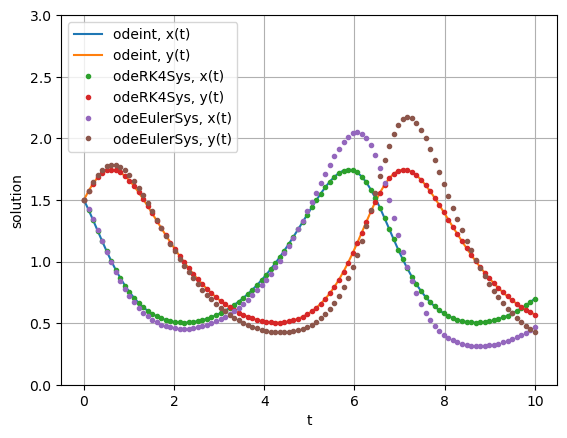

In [4]:
u0 = [1.5,1.5]
t = np.linspace(0,10,100)
c = 1
f = lambda u,t: np.array([u[0] - u[0]*u[1],c*(u[0]*u[1] - u[1])])
U = spi.odeint(f,u0,t)
plt.plot(t,U[:,0],t,U[:,1])

f = lambda t,u: np.array([u[0] - u[0]*u[1],c*(u[0]*u[1] - u[1])])
U = odeRK4Sys(f,t,u0)
plt.plot(t,U[:,0],'.')
plt.plot(t,U[:,1],'.')

f = lambda t,u: np.array([u[0] - u[0]*u[1],c*(u[0]*u[1] - u[1])])
U = odeEulerSys(f,t,u0)
plt.plot(t,U[:,0],'.')
plt.plot(t,U[:,1],'.')


plt.legend(['odeint, x(t)','odeint, y(t)','odeRK4Sys, x(t)','odeRK4Sys, y(t)','odeEulerSys, x(t)','odeEulerSys, y(t)'])
plt.grid(True)
plt.ylim([0,3])
plt.xlabel('t')
plt.ylabel('solution')
plt.show()

## Bungee Jumper

Construct a mathematical model of a [bungee jumper](https://www.youtube.com/watch?v=g3pq1Pn_Mag).

**Problem Statement:** Determine the equations of motion for a bungee jumper.

**Variables and Parameters:**

| Quantity | Symbol | Dimensions |
| :---: | :---: | :---: |
| force of spring | $F$ | M L T<sup>-2</sup> |
| time | $t$ | T |
| x-coordinate of bungee jumper | $x$ | L |
| y-coordinate of bungee jumper | $y$ | L |
| spring constant| $k$ | M T<sup>-2</sup> |
| length of unstretched bungee cord | $L$ | L |
| mass of bungee jumper | $m$ | M |
| damping coefficient | $c$ | M L<sup>-1</sup>  |
| gravity | $g$ |  L T<sup>-2</sup>  |


**Assumptions and Constraints:**
- The bungee cord cannot be compressed.
- The mass of the bungee jumper is considered as a point mass.
- All other forces and drags except those due to spring force and air drag are ignored.
- Motion is only in the x-y plane.

**Build Solutions:**
Let $L$ be the unstretched length of the bungee cord. A bungee cord cannot be compressed therefore the spring force is

$$
\mathbf{F}(\mathbf{x}) = k \left( \frac{L}{\| \mathbf{x} \|} - 1 \right) \mathbf{x} \ , \ \ \text{if } \ \ \| \mathbf{x} \| > L
$$

and $\mathbf{F}(\mathbf{x}) = 0$ otherwise. 

Define a function $h(x,y)$ that allows us to turn the spring force "on" and "off" due to the non-compression of the bungee springs. 
$$
h(x,y) = \left\{ \begin{array}{ccc} 1 & , & x^2 + y^2 > L^2 \\ 0 & , & x^2 + y^2 \leq L^2  \end{array} \right.
$$

Include drag force and apply Newton's law:

$$
\begin{align*}
m\frac{d^2x}{dt^2} &= k h(x,y) \left( \frac{L}{\sqrt{x^2 + y^2}} - 1 \right) x - c\frac{dx}{dt} \\
m\frac{d^2y}{dt^2} &= k h(x,y) \left( \frac{L}{\sqrt{x^2 + y^2}} - 1 \right) y - c\frac{dy}{dt} - mg.
\end{align*}
$$

Simplify:

$$
\begin{align*}
\frac{d^2x}{dt^2} &= h(x,y) \left( \frac{k x L}{m \sqrt{x^2 + y^2}} - \frac{kx}{m} \right) - \frac{c}{m} \frac{dx}{dt} \\
\frac{d^2y}{dt^2} &= h(x,y) \left( \frac{k y L}{m \sqrt{x^2 + y^2}} - \frac{ky}{m} \right) - \frac{c}{m} \frac{dy}{dt} - g.
\end{align*}
$$

*Nondimensionalize*
Let $x = L x^*$, $y = L y^*$, and $t = t^* \sqrt{\frac{m}{k}}.$ Substituting gives the non-dimensionalized system:

$$
\begin{align*}
\frac{d^2x^*}{dt^{*2}} &= h^*(x^*,y^*) \left( \frac{x^*}{\sqrt{x^{*2} + y^{*2}}} - x^* \right) - \gamma \frac{dx^*}{dt^*} \\
\frac{d^2y^*}{dt^{*2}} &= h^*(x^*,y^*) \left( \frac{y^*}{\sqrt{x^{*2} + y^{*2}}} - y^* \right) - \gamma \frac{dy^*}{dt^*} - \phi,
\end{align*}
$$
where $\gamma = \frac{c}{\sqrt{mk}}$ and $\phi = \frac{mg}{kL}$.

**Note:** Here, we have omitted the steps of the nondimensionalization, but for modeling assignments, it is expected that some in-between steps will be shown to guide the reader. 

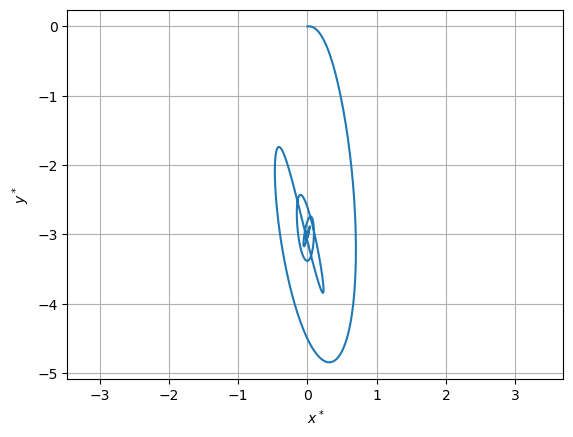

In [6]:
## parameter values
gamma = 0.25; 
phi = 2;

## function
def f(u,t):
    dudt = np.array([0.,0.,0.,0.])
    D = np.sqrt(u[0]**2 + u[2]**2)
    dudt[0] = u[1]
    dudt[2] = u[3]
    if D > 1.:
        dudt[1] = u[0]/D - u[0] - gamma*u[1]
        dudt[3] = u[2]/D - u[2] - gamma*u[3] - phi
    else:
        dudt[1] = -gamma*u[1]        
        dudt[3] = -gamma*u[3] - phi
    return dudt

#initial condition
u0 = [0.,.5,0.,.1]
#t space
t = np.linspace(0,50,1000)
#solve the DE
U = spi.odeint(f,u0,t)
#plot the solution as a phase portrait
plt.plot(U[:,0],U[:,2])
plt.xlabel('$x^*$')
plt.ylabel('$y^*$')
plt.grid(True)
plt.axis('equal')
plt.show()

**Analyze and Assess:**

Some starting points for the analysis:
- Does the output of the model make sense with the physical context of the problem?
- How does the solution change with different $\gamma$ and $\phi$ values?
- Are the assumptions realistic?
- What are some ways we could make improvements to the model?

## Trajectory of the Moon

Check your solution with a peer and discuss.  It might be helpful to review the course notes on planetary orbits and Euler's 3-body problem for this model.

## Roller Coaster
Check your solution with a peer and discuss.  It might be helpful to review the course notes on the laws of motion and forces and 2D mass spring systems for this model.

## Nitrogen Dioxide and Carbon Monoxide

Construct a mathematical model of the reactions

$$
\begin{align*}
2 NO_2 & \stackrel{k_1}{\longrightarrow} NO_3 + NO \\
NO_3 + CO & \stackrel{k_2}{\longrightarrow} NO + CO_2 \\
\end{align*}
$$

**Problem statement:** Determine how concentration profiles in the nitrogen dioxide and carbon monoxide reactions change over time. 

**Variables and parameters:**
| Description | Symbol | Dimensions |
| :---: | :---: | :---: |
| concentration of $NO_2$ | $C_0$ | N L<sup>-3</sup> |
| concentration of $NO_3$ | $C_1$ | N L<sup>-3</sup> |
| concentration of $NO$ | $C_2$ | N L<sup>-3</sup> |
| concentration of $CO$ | $C_3$ | N L<sup>-3</sup> |
| concentration of $CO_2$ | $C_4$ | N L<sup>-3</sup> |

**Assumptions and constraints:**
- There is a large enough concentration of each quantity so that the chemical reaction takes place.
- No additional amount of any susbtance is added at a later time.
- Any other by-products are negligible.
- Reaction rate constants $k_1$ and $k_2$ are constant for the entire reaction. 

**Build solutions:**

Apply the law of mass action:

$$
\begin{align*}
\frac{dC_0}{dt} &= -2 k_1 C_0^2 \\
\frac{dC_1}{dt} &= k_1 C_0^2 - k_2 C_1 C_3 \\
\frac{dC_2}{dt} &= k_1 C_0^2 + k_2 C_1 C_3 \\
\frac{dC_3}{dt} &= -k_2 C_1 C_3 \\
\frac{dC_4}{dt} &= k_2 C_1 C_3 \\
C_0(0) &= c_{0,0} \ , \ \ C_3(0) = c_{3,0} \ , \ \ C_1(0)=C_2(0)=C_4(0)=0
\end{align*}
$$

We choose not to scale concentrations and let $t = t^*/k_1$

$$
\begin{align*}
\frac{dC_0}{dt^*} &= -2 C_0^2 \\
\frac{dC_1}{dt^*} &= C_0^2 - \kappa C_1 C_3 \\
\frac{dC_2}{dt^*} &= C_0^2 + \kappa C_1 C_3 \\
\frac{dC_3}{dt^*} &= -\kappa C_1 C_3 \\
\frac{dC_4}{dt^*} &= \kappa C_1 C_3 \\
C_0(0) &= c_{0,0} \ , \ \ C_3(0) = c_{3,0} \ , \ \ C_1(0)=C_2(0)=C_4(0)=0
\end{align*}
$$

where $\kappa = \frac{k_2}{k_1}$.

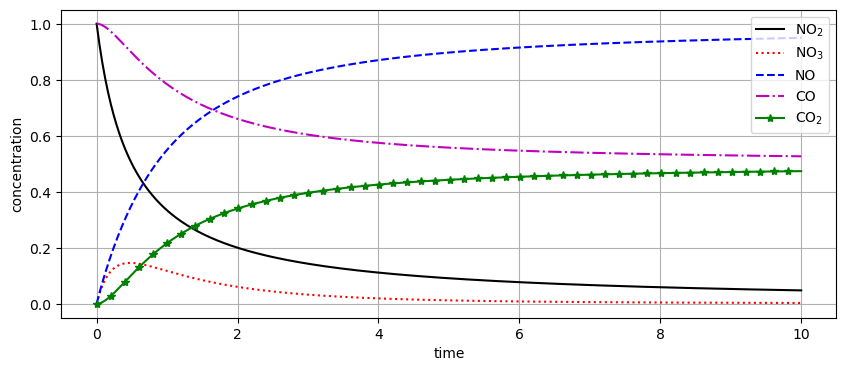

In [11]:
k = 2
def f(C,t):
    dCdt = np.array([0.,0.,0.,0.,0.])
    dCdt[0] = -2*C[0]**2
    dCdt[1] = C[0]**2 - k*C[1]*C[3]
    dCdt[2] = C[0]**2 + k*C[1]*C[3]
    dCdt[3] = -k*C[1]*C[3]
    dCdt[4] = k*C[1]*C[3]
    return dCdt
    
c0 = [1,0,0,1,0]
t = np.linspace(0,10,500)
C = spi.odeint(f,c0,t)
plt.figure(figsize=(10,4))
plt.plot(t,C[:,0],'k',t,C[:,1],':r',t,C[:,2],'--b',t,C[:,3],'-.m',t,C[:,4],'-*g',markevery=10)
plt.legend(['NO$_2$','NO$_3$','NO','CO','CO$_2$']) 
plt.xlabel('time')
plt.ylabel('concentration')
plt.grid(True)
plt.show()

**Analyze and Assess:**

Some starting points for the analysis:
- Does the output of the model make sense with the physical context of the problem?
- How does the solution change with different $k$ values?
- How does the solution change with different initial quantities of the chemicals?
- Are the assumptions realistic?
- What are some ways we could make improvements to the model?

## Heating of Hemispheres
Check your solution with a peer and discuss.  It might be helpful to review the course notes on the energy balance equation for this model.

A possible set of differential equations for this model are:
$$
\begin{align*}
C \frac{dT_0}{dt} &= \left( \frac{1}{2} + A \sin(w t) \right) (1 - \alpha) \pi R^2 S_0 - 2 \pi R^2 \sigma \epsilon T_0^4 + k(T_1 - T_0) \\
C \frac{dT_1}{dt} &= \left( \frac{1}{2} - A \sin(w t) \right) (1 - \alpha) \pi R^2 S_0 - 2 \pi R^2 \sigma \epsilon T_1^4  + k(T_0 - T_1). \\
\end{align*}
$$

## Suspension Bridge
Check your solution with a peer and discuss.  It might be helpful to review the course notes on the laws of motion and forces and 2D mass spring systems for this model.


## Bubbles
Check your solution with a peer and discuss.  It might be helpful to review the course notes on the laws of motion and forces and 2D mass spring systems for this model.